In [ ]:
!pip install catboost
!pip install mplleaflet

####Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # KFold Class.
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import xgboost as xgb
from catboost import CatBoostRegressor
from numpy import mean
from numpy import std
import mplleaflet
from sklearn.model_selection import learning_curve


## **Análise Exploratória de Dados - EDA**

####Carregando Dataframe

In [ ]:
df = pd.read_csv("kc_house_data.csv")

####Visualizando Dataframe

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Identificando Tipo, Valores Unicos, Zeros e Nulos.

In [ ]:
output = []

for col in df.columns:

    nonNull  = len(df) - np.sum(pd.isna(df[col]))
    unique = df[col].nunique()
    colType = str(df[col].dtype)
    count = df[df[col] == 0][col].count()
    percent = df[df[col] == 0][col].count() * 100 / df.shape[0]

    output.append([col, nonNull, unique, colType, count, percent])

output = pd.DataFrame(output)
output.columns = ['col_name','non-null values', 'unique', 'dtype', 'value 0', 'percent 0']
output

,col_name,non-null values,unique,dtype,value 0,percent 0
0,id,21613,21436,int64,0,0.000000
1,date,21613,372,object,0,0.000000
2,price,21613,4028,float64,0,0.000000
3,bedrooms,21613,13,int64,13,0.060149
4,bathrooms,21613,30,float64,10,0.046268
5,sqft_living,21613,1038,int64,0,0.000000
6,sqft_lot,21613,9782,int64,0,0.000000
7,floors,21613,6,float64,0,0.000000
8,waterfront,21613,2,int64,21450,99.245824
9,view,21613,5,int64,19489,90.172581




*   Não existe valores NAN
*   Todas os campos estão preenchidos
*   No geral os dados são números, apenas um objeto
*   Em algumas colulas existe muitos valores zerados



####Análisando as colunas com poucos valores únicos

In [ ]:
# def features_uniques_equals(df,size_unique=2):
output = pd.DataFrame()

for col in df.columns:
  if df[col].nunique() <= 13:
    df2 = pd.DataFrame()
    # df2[str(col+"_count")] = df[col].value_counts()
    df2[str(col)] = df[col].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'
    output = pd.concat([output,df2],axis=1)

output = output.sort_index()
# output.replace(np.nan, 0).T
output.T


,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,33.0
bedrooms,0.06%,0.921%,NaN,12.77%,NaN,45.454%,NaN,31.842%,7.408%,1.259%,0.176%,0.06%,0.028%,0.014%,0.005%,NaN,NaN,0.005%
floors,NaN,49.415%,8.837%,38.13%,0.745%,2.836%,0.037%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,99.246%,0.754%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,90.173%,1.536%,NaN,4.456%,NaN,2.36%,NaN,1.476%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,0.139%,NaN,0.796%,NaN,64.919%,NaN,26.276%,7.87%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,0.005%,NaN,NaN,NaN,0.014%,NaN,0.134%,1.12%,9.43%,41.554%,28.076%,12.099%,5.247%,1.846%,0.416%,0.06%,NaN


In [ ]:
# def features_uniques_equals(df,size_unique=2):
output = pd.DataFrame()

for col in df.columns:
  if df[col].nunique() == 30:
    df2 = pd.DataFrame()
    # df2[str(col+"_count")] = df[col].value_counts()
    df2[str(col)] = df[col].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'
    output = pd.concat([output,df2],axis=1)

# output = output.sort_index()
# output.replace(np.nan, 0).T
output

,bathrooms
2.50,24.892%
1.00,17.823%
1.75,14.103%
2.25,9.471%
2.00,8.93%
1.50,6.69%
2.75,5.483%
3.00,3.484%
3.50,3.382%
3.25,2.725%


*   Em algumas variáveis, como **waterfront** e **view** existe muitos valores zeros, porém isso não é um problema pois se trata de caracteristicas categóricas
*   Em **bedrooms** existe possivelmente um outlier

In [ ]:
df.describe().applymap('{:,.3f}'.format)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000"
mean,"4,580,301,520.865","540,088.142",3.371,2.115,"2,079.900","15,106.968",1.494,0.008,0.234,3.409,7.657,"1,788.391",291.509,"1,971.005",84.402,"98,077.940",47.560,-122.214,"1,986.552","12,768.456"
std,"2,876,565,571.312","367,127.196",0.930,0.770,918.441,"41,420.512",0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,"27,304.180"
min,"1,000,102.000","75,000.000",0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,"1,900.000",0.000,"98,001.000",47.156,-122.519,399.000,651.000
25%,"2,123,049,194.000","321,950.000",3.000,1.750,"1,427.000","5,040.000",1.000,0.000,0.000,3.000,7.000,"1,190.000",0.000,"1,951.000",0.000,"98,033.000",47.471,-122.328,"1,490.000","5,100.000"
50%,"3,904,930,410.000","450,000.000",3.000,2.250,"1,910.000","7,618.000",1.500,0.000,0.000,3.000,7.000,"1,560.000",0.000,"1,975.000",0.000,"98,065.000",47.572,-122.230,"1,840.000","7,620.000"
75%,"7,308,900,445.000","645,000.000",4.000,2.500,"2,550.000","10,688.000",2.000,0.000,0.000,4.000,8.000,"2,210.000",560.000,"1,997.000",0.000,"98,118.000",47.678,-122.125,"2,360.000","10,083.000"
max,"9,900,000,190.000","7,700,000.000",33.000,8.000,"13,540.000","1,651,359.000",3.500,1.000,4.000,5.000,13.000,"9,410.000","4,820.000","2,015.000","2,015.000","98,199.000",47.778,-121.315,"6,210.000","871,200.000"


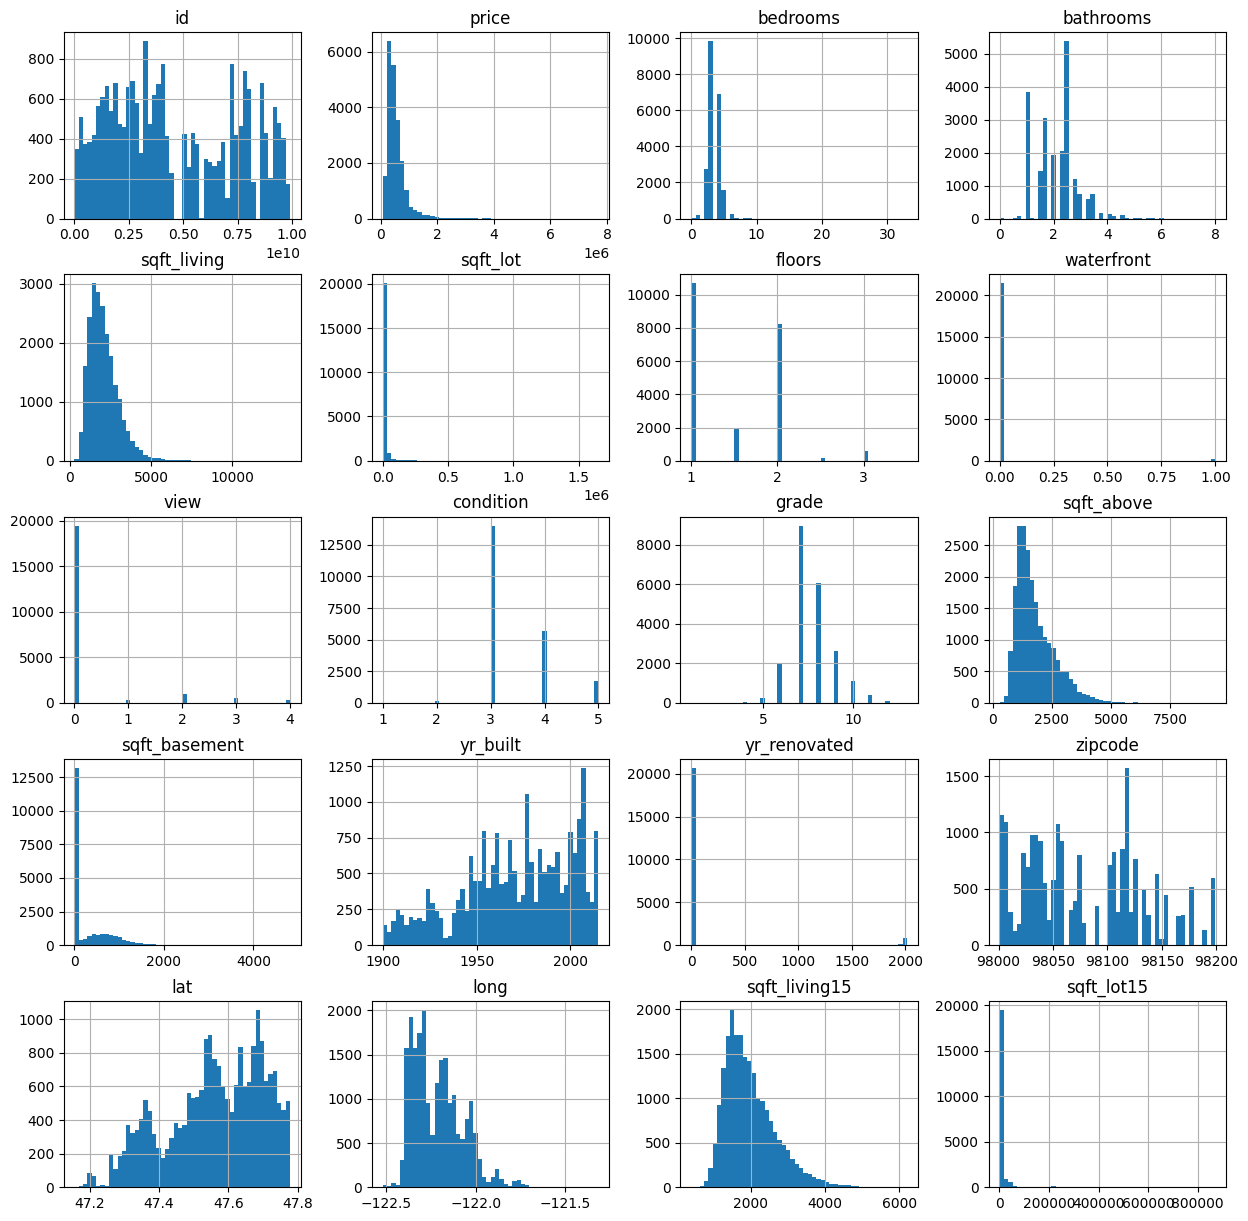

In [ ]:
df[df.columns.tolist()].hist(bins=50,figsize=(15,15))
plt.show()

<ipython-input-10-b9ba6a98de86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2g',linecolor='Green',cmap='Blues')


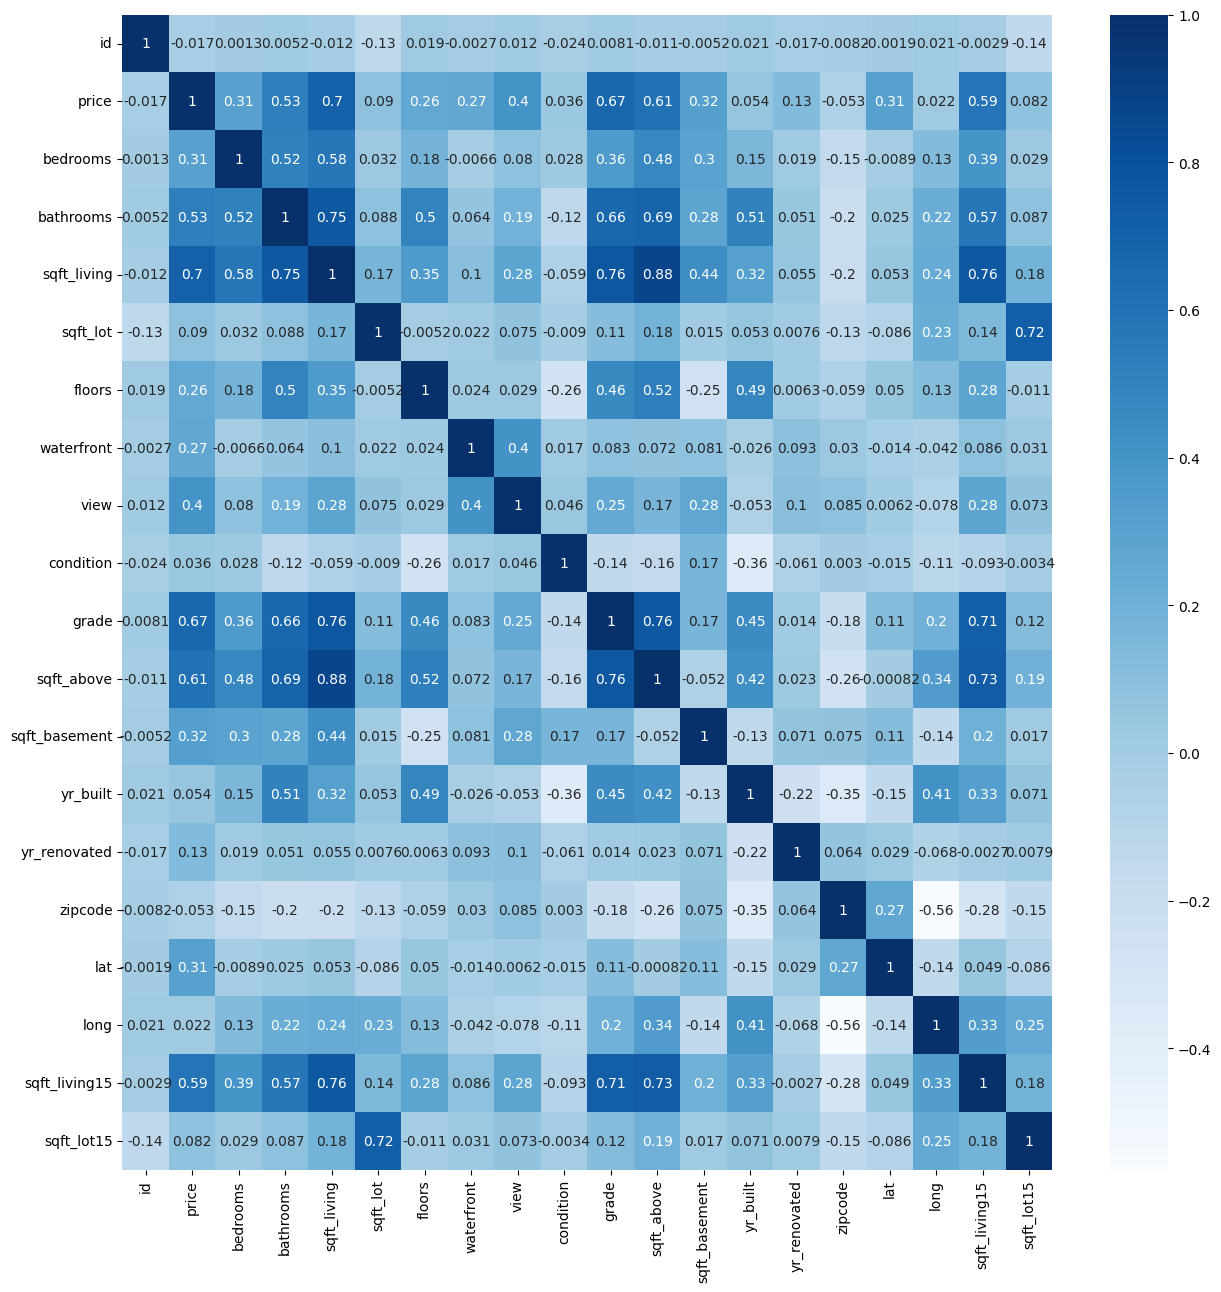

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2g',linecolor='Green',cmap='Blues')
plt.show()

<ipython-input-11-f0cbf8f21ed0>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(smap, label = 'price in USD')


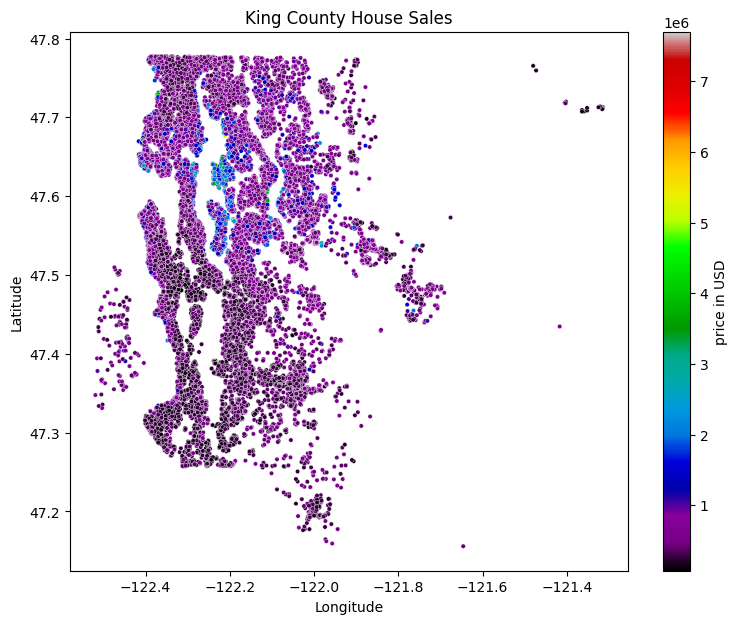

In [ ]:
#https://github.com/nadinezab/kc-house-prices-prediction/blob/master/kc-house-prices.ipynb

# Plot scatter plot
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = df['long'], y = df['lat'], hue = df['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = df)
norm = plt.Normalize(df['price'].min(), df['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()


[Text(0, 0.5, 'price'), Text(0.5, 1.0, 'Grade x Price')]

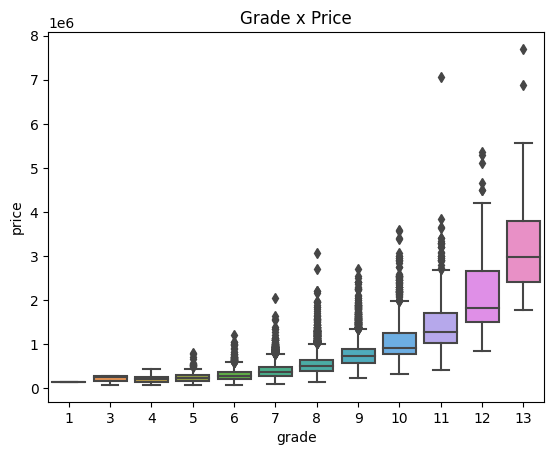

In [ ]:
sns.boxplot(x=df['grade'],y=df['price']).set(ylabel='price',title='Grade x Price')

[Text(0, 0.5, 'price'), Text(0.5, 1.0, 'View x Price')]

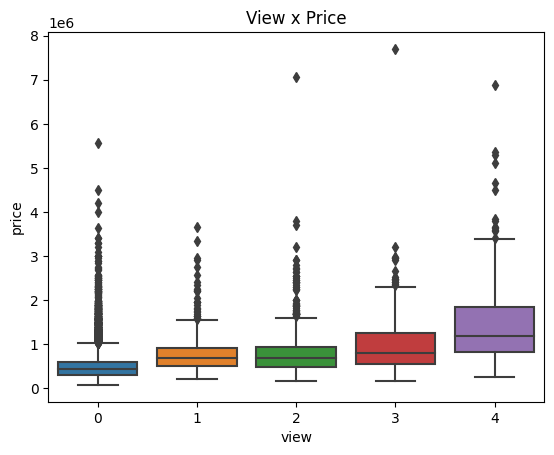

In [ ]:
sns.boxplot(x=df['view'],y=df['price']).set(ylabel='price',title='View x Price')

[Text(0, 0.5, 'price'), Text(0.5, 1.0, 'Condition x Price')]

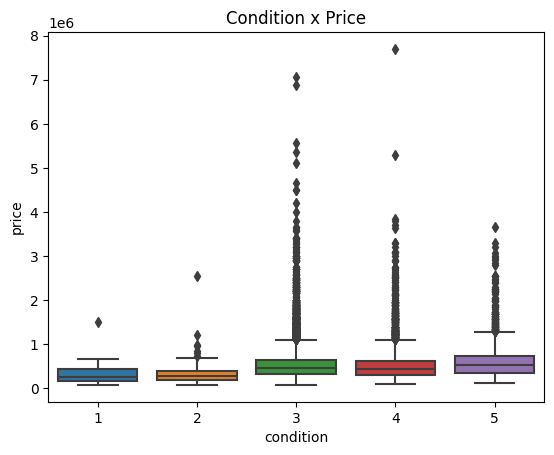

In [ ]:
sns.boxplot(x=df['condition'],y=df['price']).set(ylabel='price',title='Condition x Price')

[Text(0, 0.5, 'price'), Text(0.5, 1.0, 'floors x Price')]

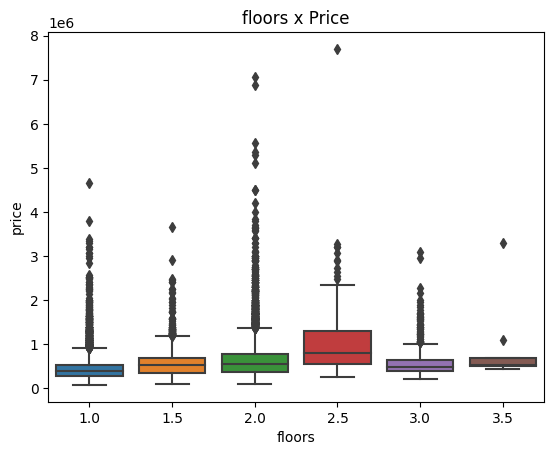

In [ ]:
sns.boxplot(x=df['floors'],y=df['price']).set(ylabel='price',title='floors x Price')

[Text(0, 0.5, 'price'), Text(0.5, 1.0, 'floors x Price')]

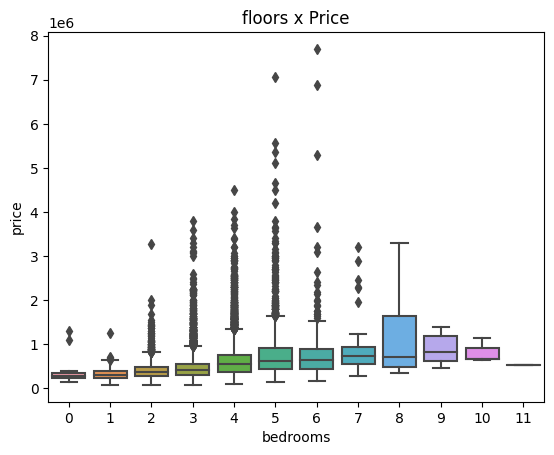

In [ ]:
sns.boxplot(x=df['bedrooms'],y=df['price']).set(ylabel='price',title='floors x Price')

<Axes: xlabel='sqft_lot', ylabel='price'>

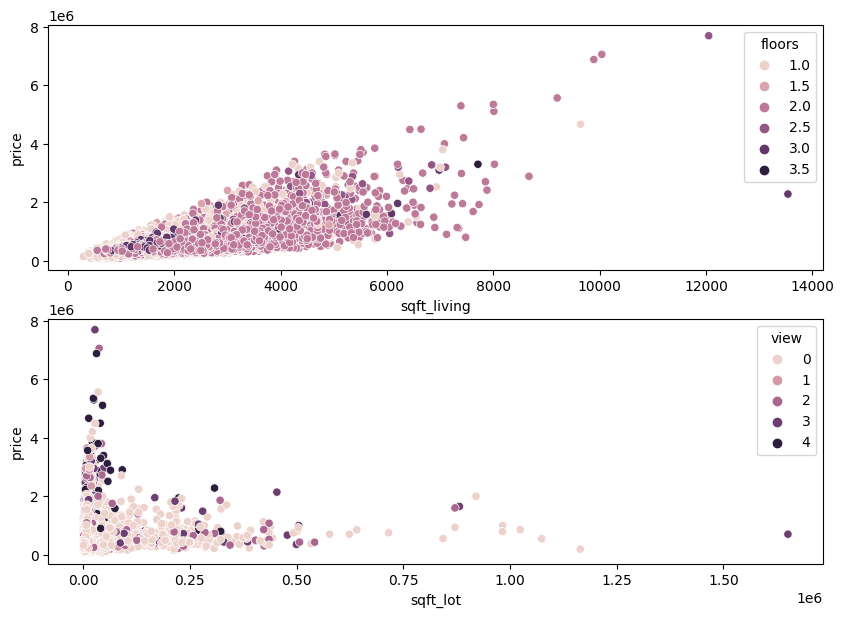

In [ ]:
plt.figure(figsize =(10 , 7))

plt.subplot(2,1,1)
sns.scatterplot(data =df,x = 'sqft_living',y= 'price', hue ="floors")

plt.subplot(2,1,2)
sns.scatterplot(data =df,x = 'sqft_lot',y= 'price', hue ="view")

In [ ]:
# mplleaflet.display()

## **Pré-Processamento**

####Tratanto outlier

In [ ]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


*   Uma casa com 33 quartos e apenas 1.75 banheiros, um indicio claro de outlier, possívelmente um erro de digitação.

In [ ]:
#obtendo a média de quartos de casa com valores similares
mean = df[df['price']==640000]['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].replace([33],int(mean))

####Eliminando Atributos que não contribuem para o modelo

## **Engenharia de Atributos**

In [ ]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [ ]:
df["date"]= pd.to_datetime(df.date)

In [ ]:
age_of_house = [df['date'][index].year - df['yr_built'][index] for index in range(df.shape[0])]
df["house_age"] = age_of_house

In [ ]:
df[df.house_age < 0]
df.drop(df[df.house_age < 0].index , inplace =True)
df.reset_index(inplace = True , drop =True)

In [ ]:
features = df.columns.tolist()
features.remove("price")

####Especificando a entrada X e a saída Y do modelo

In [ ]:
X = df[features]
y = df['price']

####Transformando Variáveis categóricas em variáveis numéricas

#####Como o zipcode é númerico e de uma forma geral, podemos considerar como uma variavel categorica, pois um grande valor pode influenciar diretamento no desempenho do modelo.

In [ ]:
#Aplicando OneHotEncoder
zipcode = pd.DataFrame(X['zipcode'])

one_hot_enc = OneHotEncoder()

data = one_hot_enc.fit_transform(zipcode)
zipcode = pd.DataFrame(data.toarray(), columns=one_hot_enc.get_feature_names_out(), dtype=int)

X.drop(['zipcode'],axis=1,inplace=True)

X = X.join(zipcode)

<ipython-input-20-9b0fe29bee9d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['zipcode'],axis=1,inplace=True)


In [ ]:
X = X.drop(['zipcode'],axis=1)

In [ ]:
X = X.drop(['id','date'],axis=1)

In [ ]:
X.columns.tolist()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'house_age',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 '

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21601 entries, 0 to 21600
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21601 non-null  int64  
 1   bathrooms      21601 non-null  float64
 2   sqft_living    21601 non-null  int64  
 3   sqft_lot       21601 non-null  int64  
 4   floors         21601 non-null  float64
 5   waterfront     21601 non-null  int64  
 6   view           21601 non-null  int64  
 7   condition      21601 non-null  int64  
 8   grade          21601 non-null  int64  
 9   sqft_above     21601 non-null  int64  
 10  sqft_basement  21601 non-null  int64  
 11  yr_built       21601 non-null  int64  
 12  yr_renovated   21601 non-null  int64  
 13  lat            21601 non-null  float64
 14  long           21601 non-null  float64
 15  sqft_living15  21601 non-null  int64  
 16  sqft_lot15     21601 non-null  int64  
 17  house_age      21601 non-null  int64  
 18  zipcod

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,0,0,0,0,0,0,0,0,0
21597,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,1,0,0,0,0,0,0,0,0,0
21598,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,0,0,0,0,0,0,0,0,0
21599,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X = X.drop(['zipcode'],axis=1)
# X = X.drop(['lat','long'],axis=1)
# X = X.loc[:18550]
# y = y.loc[:18550]

In [ ]:
df2 = pd.read_csv('/content/neighborhood_end.csv')
df2 = df2['Cidade']
df2

0            Seattle
1            Seattle
2            Kenmore
3            Seattle
4        King County
            ...     
21608      Greenwood
21609    King County
21610        Seattle
21611       Issaquah
21612        Seattle
Name: Cidade, Length: 21613, dtype: object

In [ ]:
#Aplicando OneHotEncoder
Bairro = pd.DataFrame(df2)

one_hot_enc = OneHotEncoder()

data = one_hot_enc.fit_transform(Bairro)
Bairro = pd.DataFrame(data.toarray(), columns=one_hot_enc.get_feature_names_out(), dtype=int)

# X.drop(['Bairro'],axis=1,inplace=True)

X = X.join(Bairro)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,Cidade_White Center,Cidade_Whittier Heights,Cidade_Wilderness,Cidade_Wilderness Village,Cidade_Willow Ridge,Cidade_Woodinville,Cidade_Woodinville Junction,Cidade_Woodmont,Cidade_Yesler Terrace,Cidade_none
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,0,0,0,0,0,0,0,0,0
21597,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,0,0,0,0,0,0,0,0,0,0
21598,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,0,0,0,0,0,0,0,0,0
21599,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,0,0,0,0,0,0,0,0,0,0


####Criando Modelo

In [ ]:
def create_model(data, target, algo, scaler=None):
    if scaler != None:
        X = scaler.fit_transform(data)
    else:
        X = data
    y = target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    model = algo
    model.fit(X_train, y_train)
    return(model, X_train, X_test, y_train, y_test)

In [ ]:
def print_result(X_train,X_test,y_train,y_test,model,print_data = 0,size_data=30):
  y_pred = model.predict(X_test)
  print(f'RMSE : %.3f' % mean_squared_error(y_test, y_pred, squared=False))
  print('MAE : %.3f' % mean_absolute_error(y_test, y_pred))
  print(f"SCORE (r2 metric from the own model) : {model.score(X_test,y_test):.3}")
  print(f'R2 (Test) : {r2_score(y_test,y_pred):.3}')

  # Fazendo previsões no conjunto de treinamento
  y_pred_train = model.predict(X_train)
  print(f'RMSE : %.3f' % mean_squared_error(y_train, y_pred_train, squared=False))
  print('MAE : %.3f' % mean_absolute_error(y_train, y_pred_train))
  print(f'R2 (Training) : {r2_score(y_true=y_train, y_pred=model.predict(X_train)):.3}')
  real_values = y_test.to_list()
  # for item in range(len(y_pred)):
  if print_data:
    size = len(real_values)
    if size_data > size:
      size_data = size
    print('\nReal\t\tPredicted')
    for item in range(size_data):
      print("${0:,.2f}\t${1:,.2f}".format(real_values[item],y_pred[item]))

####Modelo de regressão linear sem normalização

In [ ]:
model, X_train, X_test, y_train, y_test = create_model(X, y, LinearRegression())
print_result(X_train,X_test,y_train,y_test,model)

RMSE : 152346.362
MAE : 94906.511
SCORE (r2 metric from the own model) : 0.818
R2 (Test) : 0.818
RMSE : 163730.261
MAE : 97063.072
R2 (Training) : 0.806


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(LinearRegression(), X, y, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.81689257 0.79967901 0.79344065 0.80940096 0.81536491]
Mean R^2 for Cross-Validation K-Fold: 0.8069556188267327


####Modelo de regressão linear com normalização

### Podem ser utilizados:

* StandardScaler: Padroniza os atributos removendo a média e dimensionando para a variação unitária;
* MaxAbsScaler: Dimensiona cada atributo pelo seu valor absoluto máximo;
* MinMaxScaler: Transforma os atributos dimensionando cada recurso para um determinado intervalo;
* RobustScaler: Dimensiona os atributos usando estatísticas robustas para valores discrepantes (outliers).

In [ ]:
# scaler = StandardScaler()
# scaler = MaxAbsScaler()
# scaler = MinMaxScaler()
scaler = RobustScaler(with_centering=False, with_scaling=True)

regressor = LinearRegression()
model, X_train, X_test, y_train, y_test = create_model(X, y, regressor,scaler)
print_result(X_train,X_test,y_train,y_test,model)

RMSE : 152318.124
MAE : 94875.302
SCORE (r2 metric from the own model) : 0.818
R2 (Test) : 0.818
RMSE : 163727.926
MAE : 97034.248
R2 (Training) : 0.806


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(model, X, y, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.77634932 0.84994243 0.81230967 0.78422905 0.80360457 0.77945814
 0.82103679 0.81889453 0.82223232 0.81701576]
Mean R^2 for Cross-Validation K-Fold: 0.8085072598133338


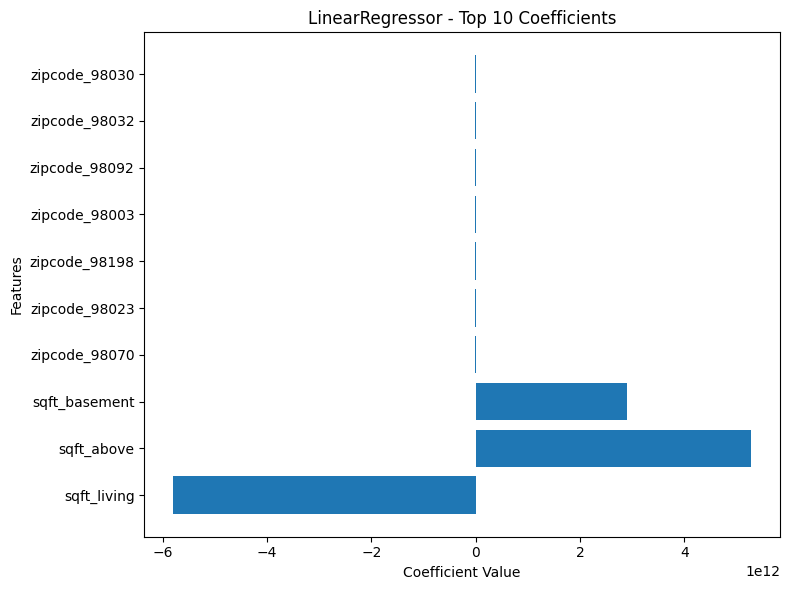

In [ ]:
coefficients = model.coef_

# Obtendo o nome das features do conjunto de dados (supondo que estejam em uma lista chamada 'feature_names')
feature_names = X.columns.tolist()

# Ordenando os coeficientes das features
sorted_idx = np.argsort(np.abs(coefficients))[::-1]  # Obtém os índices dos coeficientes em ordem decrescente

# Pegando os 10 coeficientes mais importantes
top_coefficients = sorted_idx[:10]
top_coefficients_values = coefficients[top_coefficients]
top_feature_names = np.array(feature_names)[top_coefficients]

# Plotando as 10 features mais importantes em barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(range(len(top_coefficients_values)), top_coefficients_values, align='center')
plt.yticks(range(len(top_coefficients_values)), top_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('LinearRegressor - Top 10 Coefficients')
plt.tight_layout()
plt.show()

In [ ]:
#catboost
regressor = CatBoostRegressor(loss_function='RMSE', iterations=1000, depth=6,  colsample_bylevel=.4,
                             eval_metric='MAE', subsample=.5, random_state=1, verbose=0, eta=.1, cat_features=['view','grade','condition','waterfront'])
model, X_train, X_test, y_train, y_test = create_model(X, y, regressor)
print_result(X_train,X_test,y_train,y_test,model)

RMSE : 106112.861
MAE : 61536.783
SCORE (r2 metric from the own model) : 0.912
R2 (Test) : 0.912
RMSE : 65793.664
MAE : 46121.367
R2 (Training) : 0.969


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(regressor, X, y, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.90993775 0.92166892 0.91642899 0.91158079 0.87828544 0.89330984
 0.91355025 0.89858496 0.91637359 0.91042351]
Mean R^2 for Cross-Validation K-Fold: 0.9070144053330017


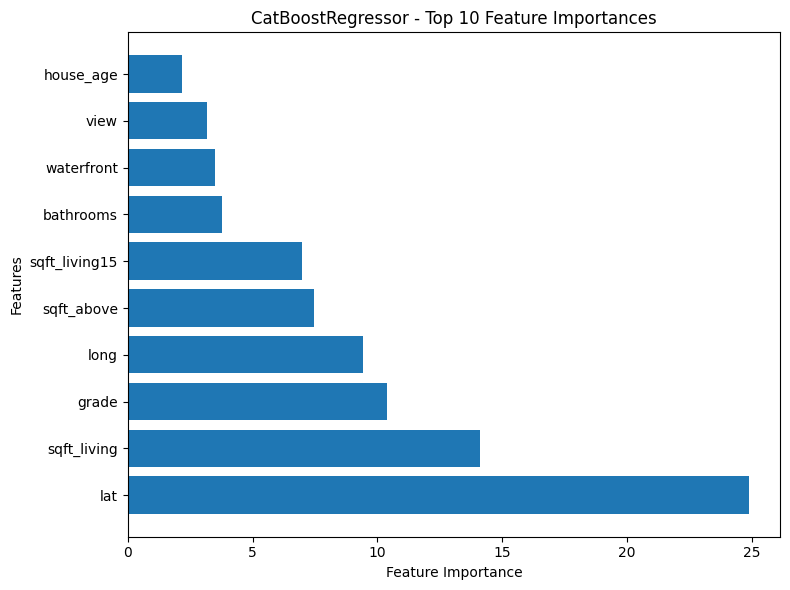

In [ ]:
# Acessando a importância das features
feature_importance = model.feature_importances_

# Obtendo o nome das features do conjunto de dados (supondo que estejam em uma lista chamada 'feature_names')
feature_names = X.columns.tolist()

# Ordenando as importâncias das features e os nomes correspondentes
sorted_idx = np.argsort(feature_importance)[::-1]  # Obtém os índices das importâncias em ordem decrescente

# Pegando as 10 features mais importantes
top_features = sorted_idx[:10]
top_feature_importance = feature_importance[top_features]
top_feature_names = np.array(feature_names)[top_features]

# Plotando as 10 features mais importantes em barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(range(len(top_feature_importance)), top_feature_importance, align='center')
plt.yticks(range(len(top_feature_importance)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoostRegressor - Top 10 Feature Importances')
plt.tight_layout()
plt.show()

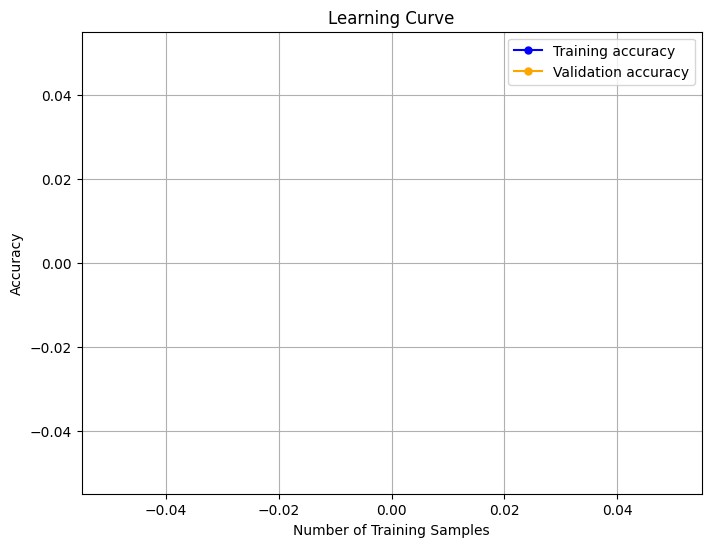

In [ ]:
# Calcular a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular as médias e desvios padrão dos escores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_mean, marker='o', markersize=5, color='blue', label='Training accuracy')
plt.plot(train_sizes, test_mean, marker='o', markersize=5, color='orange', label='Validation accuracy')
plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
model = CatBoostRegressor()
parameters = {'depth'         : [5, 6, 7],
              'learning_rate' : [0.1, 0.3, 0.5],
              'iterations'    : [1000],
              'l2_leaf_reg'   : [3, 5, 6],
              'subsample'     : [0.1, 0.5, 1]
 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10, n_jobs=-1)
grid.fit(X_train, y_train)

# Results from Grid Search
# print("\n========================================================")
# print(" Results from Grid Search " )
# print("========================================================")

# print("\n The best estimator (model) across ALL searched params:\n", grid.best_estimator_)

# print("\n The best score across ALL searched params:\n", grid.best_score_)

# print("\n The best parameters across ALL searched params:\n", grid.best_params_)
model = grid.best_estimator_
print_result(X_train,X_test,y_train,y_test,model)
print(grid.best_params_)


KeyboardInterrupt: ignored

In [ ]:

model = grid.best_estimator_
print_result(X_train,X_test,y_train,y_test,model)

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}
RMSE : 107432.636
MAE : 61821.812
SCORE (r2 metric from the own model) : 0.91
R2 (Test) : 0.91
R2 (Training) : 0.967


In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
result = cross_val_score(model, X, y, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))